In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/online_retail_customer_churn.csv')
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [ ]:
df.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

In [ ]:
df = df.drop('Customer_ID', axis=1)

In [ ]:
def label_encode_columns(dataset):
  label_encoder = LabelEncoder()
  for column in dataset.columns:
    if dataset[column].dtype == 'object' or dataset[column].dtype=='float64' or dataset[column].dtype=='bool':
      dataset[column] = label_encoder.fit_transform(dataset[column])
  return dataset
df = label_encode_columns(df)
df

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,2,136,585,5,22,873,2,0,3,129,1,1,1
1,65,1,322,893,13,77,25,2,2,3,227,0,1,0
2,18,1,56,45,13,71,85,5,2,2,283,0,1,1
3,21,2,323,903,3,33,776,5,3,5,226,1,0,1
4,21,2,311,534,15,43,177,3,0,5,242,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,1,644,98,2,29,132,0,3,2,88,1,0,0
996,19,1,760,362,9,90,44,6,4,4,352,0,1,1
997,47,0,482,53,17,69,341,7,3,1,172,1,2,0
998,23,1,277,386,7,31,946,1,2,5,55,0,1,1


In [ ]:
df.dtypes

Age                           int64
Gender                        int64
Annual_Income                 int64
Total_Spend                   int64
Years_as_Customer             int64
Num_of_Purchases              int64
Average_Transaction_Amount    int64
Num_of_Returns                int64
Num_of_Support_Contacts       int64
Satisfaction_Score            int64
Last_Purchase_Days_Ago        int64
Email_Opt_In                  int64
Promotion_Response            int64
Target_Churn                  int64
dtype: object

In [ ]:
df.head(10)

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,2,136,585,5,22,873,2,0,3,129,1,1,1
1,65,1,322,893,13,77,25,2,2,3,227,0,1,0
2,18,1,56,45,13,71,85,5,2,2,283,0,1,1
3,21,2,323,903,3,33,776,5,3,5,226,1,0,1
4,21,2,311,534,15,43,177,3,0,5,242,0,2,0
5,57,1,910,13,19,85,787,5,1,4,130,0,2,0
6,27,1,813,343,3,77,573,0,3,1,61,1,2,0
7,37,2,367,711,4,87,108,3,4,3,224,0,0,0
8,39,2,21,495,1,21,307,9,2,4,126,1,1,1
9,68,2,796,982,17,34,936,6,1,2,171,1,2,0


In [ ]:
df.tail()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
995,54,1,644,98,2,29,132,0,3,2,88,1,0,0
996,19,1,760,362,9,90,44,6,4,4,352,0,1,1
997,47,0,482,53,17,69,341,7,3,1,172,1,2,0
998,23,1,277,386,7,31,946,1,2,5,55,0,1,1
999,34,2,599,392,15,48,795,6,0,1,269,1,0,1


In [ ]:
df.describe()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.267000,0.982000,486.396000,499.500000,9.727000,49.456000,493.870000,4.612000,1.934000,2.974000,182.890000,0.529000,1.060000,0.526000
std,15.242311,0.816298,280.301495,288.819436,5.536346,28.543595,285.498821,2.896869,1.402716,1.391855,104.391319,0.499408,0.811825,0.499573
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,244.750000,249.750000,5.000000,25.000000,246.750000,2.000000,1.000000,2.000000,93.000000,0.000000,0.000000,0.000000
50%,43.000000,1.000000,486.500000,499.500000,9.000000,49.000000,494.500000,5.000000,2.000000,3.000000,180.500000,1.000000,1.000000,1.000000
75%,56.000000,2.000000,728.250000,749.250000,14.000000,74.000000,742.250000,7.000000,3.000000,4.000000,274.000000,1.000000,2.000000,1.000000
max,69.000000,2.000000,971.000000,999.000000,19.000000,99.000000,987.000000,9.000000,4.000000,5.000000,364.000000,1.000000,2.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         1000 non-null   int64
 1   Gender                      1000 non-null   int64
 2   Annual_Income               1000 non-null   int64
 3   Total_Spend                 1000 non-null   int64
 4   Years_as_Customer           1000 non-null   int64
 5   Num_of_Purchases            1000 non-null   int64
 6   Average_Transaction_Amount  1000 non-null   int64
 7   Num_of_Returns              1000 non-null   int64
 8   Num_of_Support_Contacts     1000 non-null   int64
 9   Satisfaction_Score          1000 non-null   int64
 10  Last_Purchase_Days_Ago      1000 non-null   int64
 11  Email_Opt_In                1000 non-null   int64
 12  Promotion_Response          1000 non-null   int64
 13  Target_Churn                1000 non-null   int64
dtypes: int64(

In [ ]:
#cek missing value
df.isnull().sum()

Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [ ]:
#cek korelasi
korelasi = df.corr()
korelasi

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
Age,1.000000,-0.067836,0.040027,-0.032728,-0.024781,0.031459,0.006231,0.000331,-0.021226,0.017408,0.009790,0.001283,-0.003399,-0.009260
Gender,-0.067836,1.000000,-0.061894,-0.027963,-0.018586,-0.024866,-0.010056,-0.013539,-0.007158,-0.019795,-0.007964,0.035658,0.025800,0.020786
Annual_Income,0.040027,-0.061894,1.000000,0.018936,-0.027937,0.026296,0.006046,0.039785,0.022419,0.016201,0.038322,0.006947,-0.006083,-0.036838
Total_Spend,-0.032728,-0.027963,0.018936,1.000000,0.037713,0.045622,-0.086784,0.010774,-0.036385,-0.004121,-0.038222,0.034717,-0.043584,0.028701
Years_as_Customer,-0.024781,-0.018586,-0.027937,0.037713,1.000000,0.017676,-0.019579,0.042259,-0.008638,-0.027812,-0.011783,-0.040759,0.012557,-0.029823
Num_of_Purchases,0.031459,-0.024866,0.026296,0.045622,0.017676,1.000000,-0.020469,-0.004420,0.009478,0.006799,-0.044072,0.010798,0.032858,-0.032772
Average_Transaction_Amount,0.006231,-0.010056,0.006046,-0.086784,-0.019579,-0.020469,1.000000,0.013152,0.041034,0.017315,0.036265,-0.024756,0.008291,-0.025804
Num_of_Returns,0.000331,-0.013539,0.039785,0.010774,0.042259,-0.004420,0.013152,1.000000,0.080650,-0.003001,0.036108,-0.008129,0.008206,0.000061
Num_of_Support_Contacts,-0.021226,-0.007158,0.022419,-0.036385,-0.008638,0.009478,0.041034,0.080650,1.000000,0.033984,-0.023189,0.024169,-0.006188,0.009593
Satisfaction_Score,0.017408,-0.019795,0.016201,-0.004121,-0.027812,0.006799,0.017315,-0.003001,0.033984,1.000000,0.018692,0.047168,-0.023423,0.022567


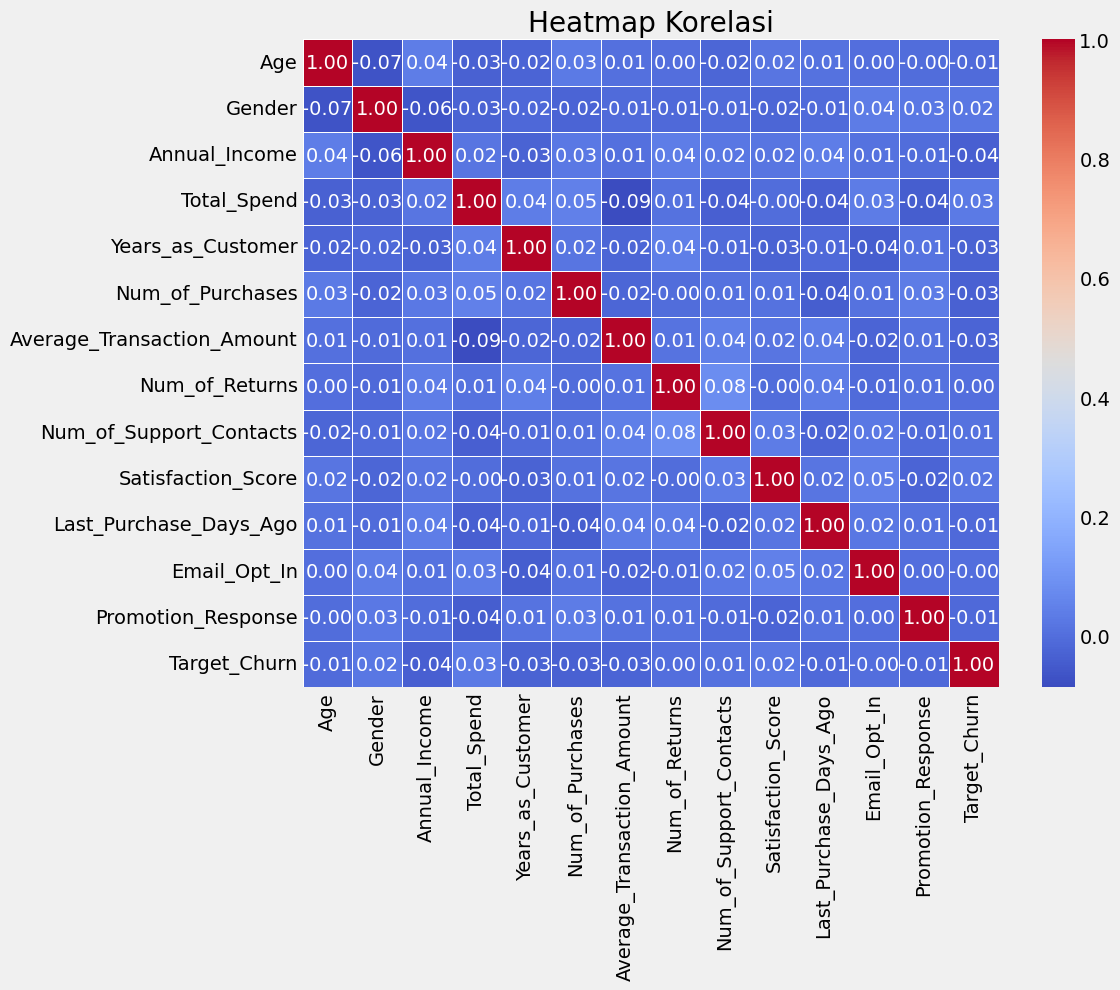

In [ ]:
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

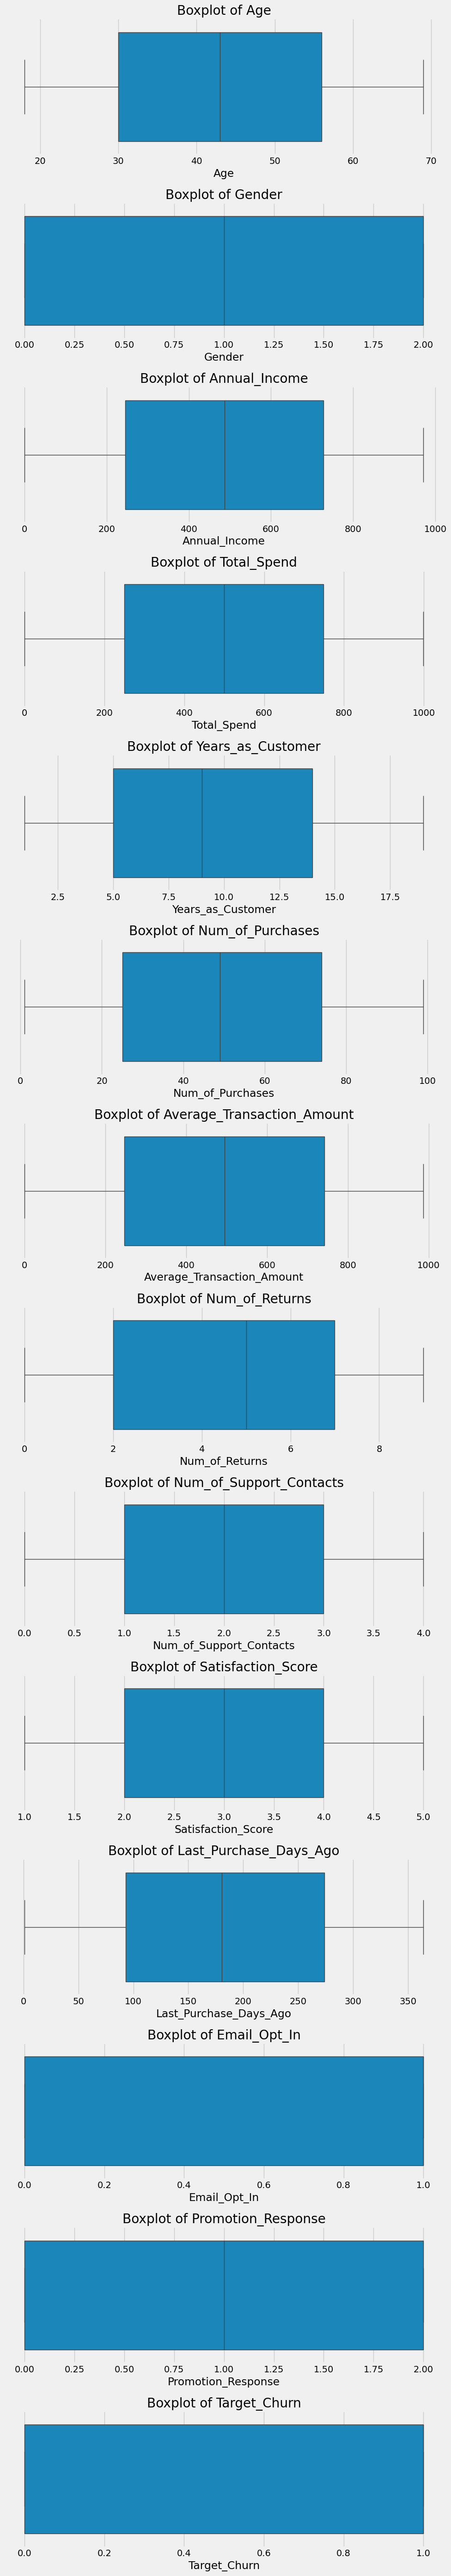

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom yang ingin diperiksa outlier-nya
columns_to_check = ['Age', 'Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
       'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
       'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn']

# Membuat subplots untuk setiap kolom
fig, axes = plt.subplots(nrows=len(columns_to_check), figsize=(10, 4 * len(columns_to_check)))

# Menampilkan boxplot untuk setiap kolom
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


#Modelling

In [ ]:
df.columns

Index(['Age', 'Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
       'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
       'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [ ]:
#Split data

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target_Churn'], axis=1),
                                                    df['Target_Churn'],
                                                    test_size=0.2,
                                                    random_state=1)

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Decision tree evaluasi model
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.555
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.52      0.55       103
           1       0.54      0.59      0.56        97

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.55       200



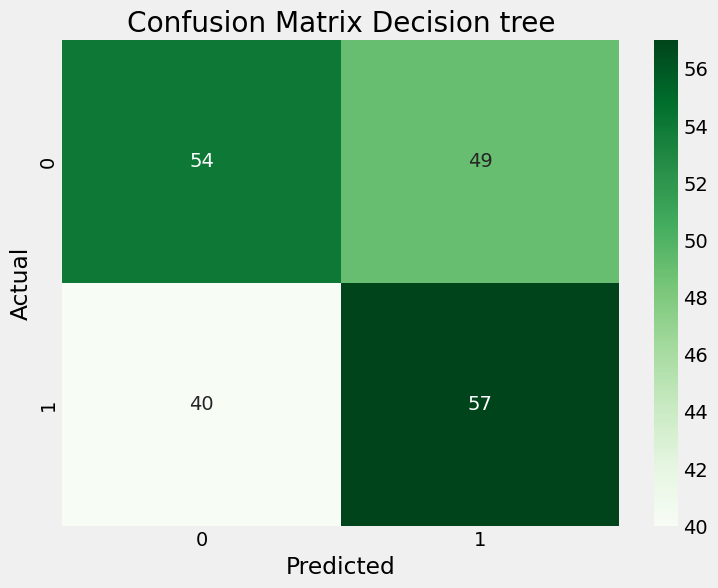

In [ ]:
y_pred=dt_model.predict(X_test)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
DT_acc = accuracy_score(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix Decision tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.485
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.42      0.46       103
           1       0.47      0.56      0.51        97

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.48      0.48       200



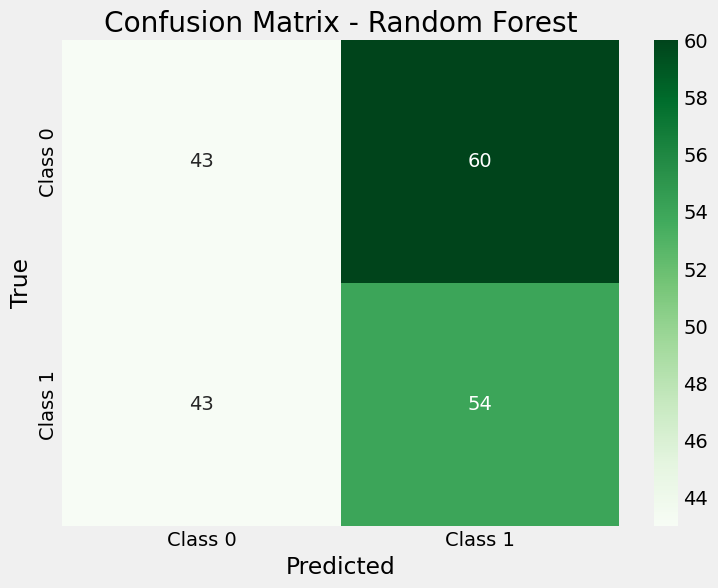

In [ ]:
# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

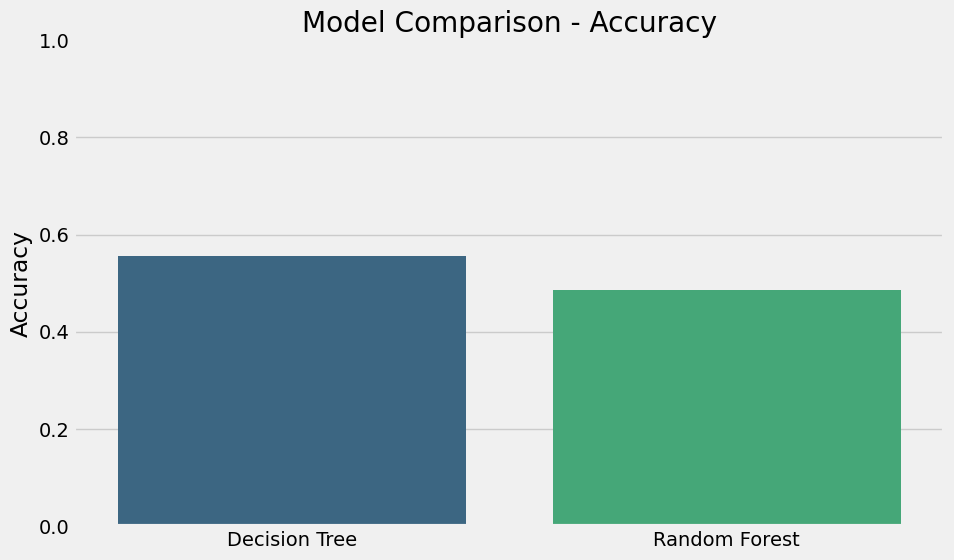

In [ ]:
#Comparasion Model

# Decision Tree
dt_acc = accuracy_score(y_test, dt_pred)

# Random Forest
rf_acc = accuracy_score(y_test, rf_pred)


# Create a bar plot for model comparison
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_acc, rf_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1.0)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()